
# Telco Customer Churn


## Problem
Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir.

## Veri Seti Hikayesi
Telco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan
hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.
### 21 Değişken 7043 Gözlem

### CustomerId : Müşteri İd’si
### Gender : Cinsiyet
### SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
### Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
### Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
### tenure : Müşterinin şirkette kaldığı ay sayısı
### PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
### MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
### InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
### OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
### OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
### DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
### TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
### StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
### StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
### Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
### PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
### PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
### MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
### TotalCharges : Müşteriden tahsil edilen toplam tutar
### Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler

Her satır benzersiz bir müşteriyi temsil etmekte.
Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.
Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı

In [110]:
#Gerekli kütüphaneler ve fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
warnings.simplefilter(action="ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Daha önce yazdığım data prep ve EDA fonksiyonlarını da import edelim
#Bu fonksiyonları da yüklemiş olacağım
from eda import *
from data_prep import *

In [73]:
#Veri setinin okunması
df=pd.read_csv("../Datasets/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


##  Keşifçi Veri Analizi


In [74]:
df.info()
#Bazı verilerin tipi yanlış onları değiştirmemiz lazım (TotalCharges)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
#Total charges değişkeninin tipini float yapalım
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
#Numerik ve kategorik değişkenleri yakalayalım
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


************tenure*****************
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64



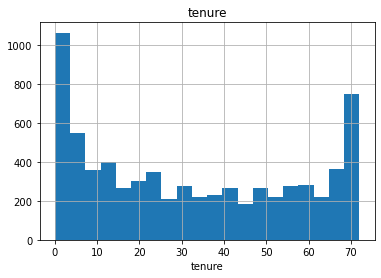

************MonthlyCharges*****************
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64



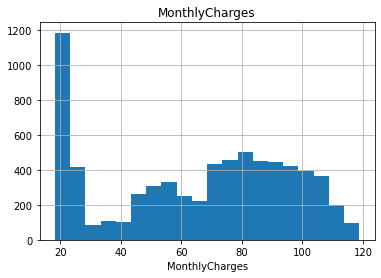

************TotalCharges*****************
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64



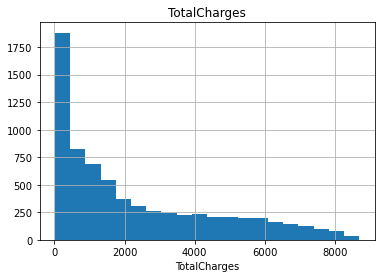

In [77]:
#Numeric değişkenleri gözlemleyelim
for col in num_cols:
    print("************{}*****************".format(col))
    num_summary(df,col,plot=True)

****************gender*****************
        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################


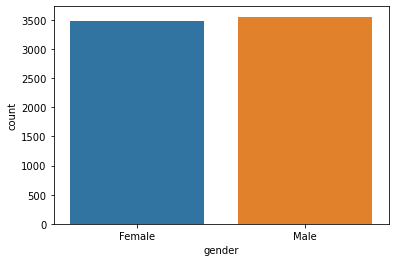

****************Partner*****************
     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################


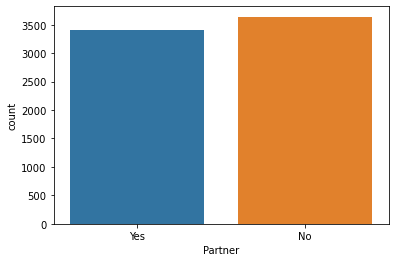

****************Dependents*****************
     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################


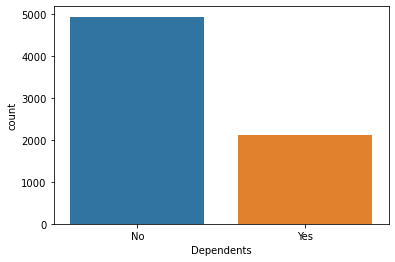

****************PhoneService*****************
     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################


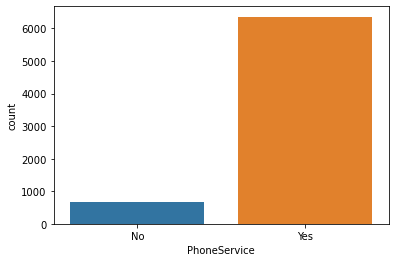

****************MultipleLines*****************
                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


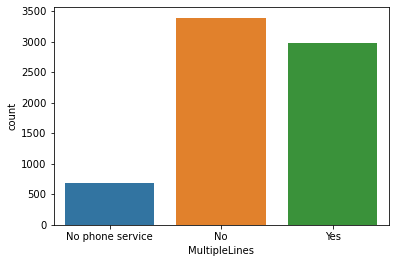

****************InternetService*****************
             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################


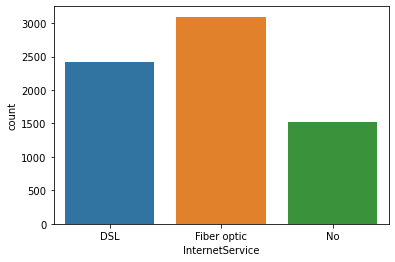

****************OnlineSecurity*****************
                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


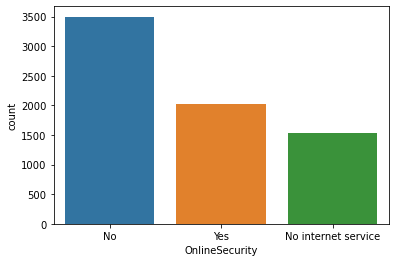

****************OnlineBackup*****************
                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


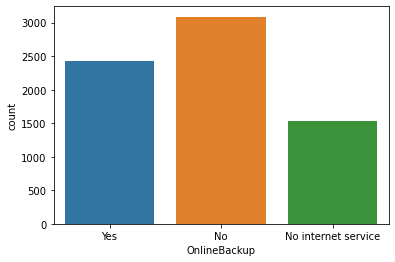

****************DeviceProtection*****************
                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


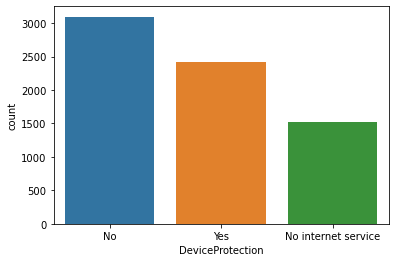

****************TechSupport*****************
                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


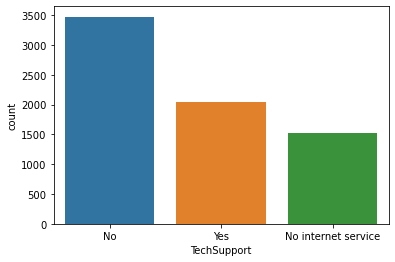

****************StreamingTV*****************
                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


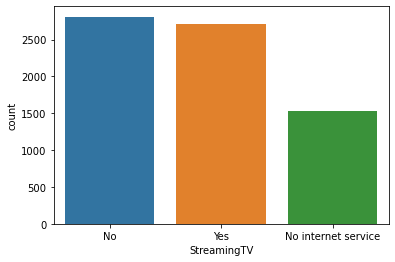

****************StreamingMovies*****************
                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


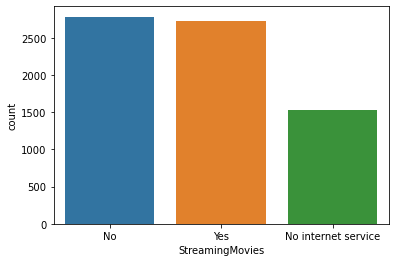

****************Contract*****************
                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


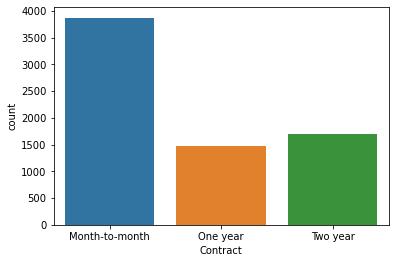

****************PaperlessBilling*****************
     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
##########################################


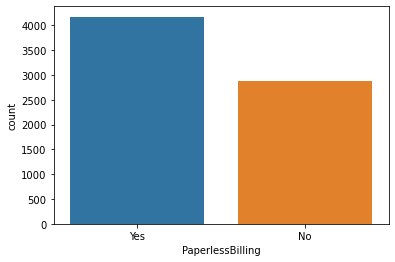

****************PaymentMethod*****************
                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


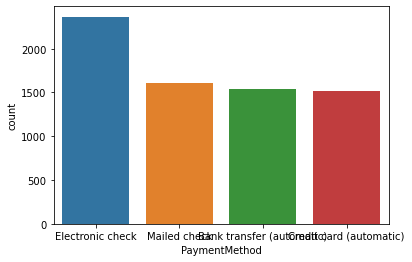

****************Churn*****************
     Churn  Ratio
No    5174 73.463
Yes   1869 26.537
##########################################


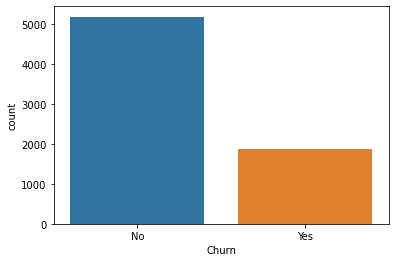

****************SeniorCitizen*****************
   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
##########################################


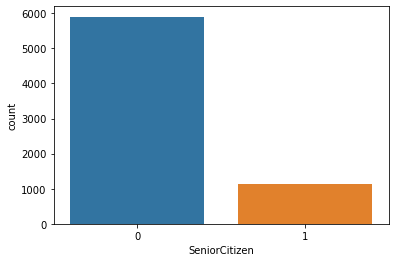

In [78]:
#Kategorik değişkenleri gözlemleyelim
for col in cat_cols:
    print("****************{}*****************".format(col))
    cat_summary(df,col,plot=True)

In [79]:
#Sayısal değişkenlerin istatistiksel özelliklerine bakalım
df.describe([0.1,0.25,0.5,0.75,0.90,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
tenure,7043.000,32.371,24.559,0.000,2.000,9.000,29.000,55.000,69.000,72.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,20.050,35.500,70.350,89.850,102.600,114.729,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,84.600,401.450,1397.475,3794.738,5976.640,8039.883,8684.800


In [80]:
#Aykırı değer yok gibi gözüküyor ama yine de kontrol edelim
for col in num_cols:
    if(check_outlier(df,col,q1=0.1,q3=0.9)):
        print("There are outliers in {}".format(col))
    else:
        print("There is no outliers in{}".format(col))

There is no outliers intenure
There is no outliers inMonthlyCharges
There is no outliers inTotalCharges


In [81]:
#Eksik değer var mı diye kontrol edelim
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [82]:
#Eksik gözlemler az sayıda olduğu için droplayalım
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Feature Engineering

In [97]:
#old_male old_female değişkenleri oluşturalım
df.loc[(df["gender"]=="Male")&(df["SeniorCitizen"]==1),"old_male"]=1
df.loc[(df["gender"]!="Male")|(df["SeniorCitizen"]!=1),"old_male"]=0

df.loc[(df["gender"]=="Female")&(df["SeniorCitizen"]==1),"old_female"]=1
df.loc[(df["gender"]!="Female")|(df["SeniorCitizen"]!=1),"old_female"]=0

#partner_with_depedents değişkeni oluşturalım
df.loc[(df["Partner"]=="Yes")&(df["Dependents"]=="Yes"),"partner_with_depedents"]=1
df.loc[(df["Partner"]!="Yes")|(df["Dependents"]!="Yes"),"partner_with_depedents"]=0

#total_contract_payment değişkeni oluşturalım(MontlyCharges*contract)
df.loc[df["Contract"]=="Month-to-month","total_contract_payment"]=df["MonthlyCharges"]
df.loc[df["Contract"]=="One year","total_contract_payment"]=df["MonthlyCharges"]*12
df.loc[df["Contract"]=="Two year","total_contract_payment"]=df["MonthlyCharges"]*24

#Hefed değişkeni 1 ve 0 olarak yeniden değiştirelim
df.loc[df["Churn"]=="Yes","Churn"]=1
df.loc[df["Churn"]=="No","Churn"]=0
df["Churn"]=df["Churn"].astype(int)

# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [98]:
#Veri Setinin son haline bakalım
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,old_male,old_female,partner_with_depedents,total_contract_payment,customer_life_time,NEW_TENURE_YEAR,NEW_noProt,NEW_TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.850,0,0.000,0.000,0.000,29.850,New,0-1 Year,1,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.500,0,0.000,0.000,0.000,683.400,Mid,2-3 Year,1,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.150,1,0.000,0.000,0.000,53.850,New,0-1 Year,1,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.750,0,0.000,0.000,0.000,507.600,Old,3-4 Year,1,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.650,1,0.000,0.000,0.000,70.700,New,0-1 Year,1,1


In [99]:
#Yeni ürettiğimiz değişkenlerde eksik değer var mı kontrol edelim
df.isnull().sum()

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
old_male                  0
old_female                0
partner_with_depedents    0
total_contract_payment    0
customer_life_time        0
NEW_TENURE_YEAR           0
NEW_noProt                0
NEW_TotalServices         0
dtype: int64

### Encoding İşlemleri


In [100]:
# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 29
cat_cols: 24
num_cols: 4
cat_but_car: 1
num_but_cat: 7


In [102]:
#Binary columnları label encoderdan geçirelim
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df=label_encoder(df,col)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,old_male,old_female,partner_with_depedents,total_contract_payment,customer_life_time,NEW_TENURE_YEAR,NEW_noProt,NEW_TotalServices
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,29.850,0,0.000,0.000,0.000,29.850,New,0-1 Year,1,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,1889.500,0,0.000,0.000,0.000,683.400,Mid,2-3 Year,1,3
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,108.150,1,0.000,0.000,0.000,53.850,New,0-1 Year,1,3
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,1840.750,0,0.000,0.000,0.000,507.600,Old,3-4 Year,1,3
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,151.650,1,0.000,0.000,0.000,70.700,New,0-1 Year,1,1


In [104]:
# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
df=one_hot_encoder(df,cat_cols,drop_first=True)
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,old_male_1.0,old_female_1.0,partner_with_depedents_1.0,NEW_noProt_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,...,0,1,0,0,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,...,0,0,1,0,0,0,0,0,0,1
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,...,0,0,0,0,0,0,0,0,0,1


### Standartlaştırma

In [108]:
#Sayısal değişkenleri standarlaştıralım
scaler=RobustScaler()
for col in num_cols:
    df[col]=scaler.fit_transform(df[[col]])
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,old_male_1.0,old_female_1.0,partner_with_depedents_1.0,NEW_noProt_1
0,7590-VHVEG,0,1,0,-0.609,0,1,-0.746,-0.403,0,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,1,0,0,0.109,1,0,-0.247,0.145,0,...,0,1,0,0,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,-0.587,1,1,-0.304,-0.380,1,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0.348,0,0,-0.517,0.131,0,...,0,0,1,0,0,0,0,0,0,1
4,9237-HQITU,0,0,0,-0.587,1,1,0.006,-0.367,1,...,0,0,0,0,0,0,0,0,0,1


## Modelleme

In [109]:
#Hedef değişkeni ve diğerlerini ayıralım
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [111]:
#Kullancağımız modelleri seçelim ve 10 katlı cross-valdation ile sonuçlara bakalım
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVM', SVC(gamma='auto')),
          ('XGB', XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(verbose=False))]
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
#XGB,RandomForest,LightGBM modellerinin hiper-parametre optimizasyonunu yapalım

########## LR ##########
Accuracy: 0.8043
Auc: 0.8485
Recall: 0.5211
Precision: 0.6704
F1: 0.5858
########## KNN ##########
Accuracy: 0.7723
Auc: 0.7809
Recall: 0.5302
Precision: 0.5784
F1: 0.553
########## CART ##########
Accuracy: 0.727
Auc: 0.6555
Recall: 0.4987
Precision: 0.4869
F1: 0.4926
########## RF ##########
Accuracy: 0.7919
Auc: 0.8279
Recall: 0.4933
Precision: 0.6424
F1: 0.5577
########## SVM ##########
Accuracy: 0.7982
Auc: 0.8236
Recall: 0.4617
Precision: 0.6768
F1: 0.5484
########## XGB ##########
Accuracy: 0.7858
Auc: 0.8256
Recall: 0.5174
Precision: 0.6173
F1: 0.5626
########## LightGBM ##########
Accuracy: 0.7975
Auc: 0.8362
Recall: 0.526
Precision: 0.6471
F1: 0.58
########## CatBoost ##########
Accuracy: 0.8009
Auc: 0.8424
Recall: 0.5259
Precision: 0.658
F1: 0.5844


## Hiperparametre Optimizasyonu

In [112]:
############
#RandomForest
############
rf_model = RandomForestClassifier()

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
print(rf_best_grid.best_params_)
print(rf_best_grid.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 100}
0.8017615640553583


In [114]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_).fit(X, y)
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print(f"########## Random Forest Final ##########")
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
#Hiperparametre Optimizasyonundan önce:
#Accuracy: 0.7919
#Auc: 0.8279
#Recall: 0.4933
#Precision: 0.6424
#F1: 0.5577

########## Random Forest Final ##########
Accuracy: 0.8015
Auc: 0.8457
Recall: 0.5008
Precision: 0.6699
F1: 0.5728


In [115]:
############
#XGBoost
###########
xgboost_model = XGBClassifier()

xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)
cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(f"########## XGBoost Final ##########")
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
#Hiperparametre optimizasyonundan önce
#Accuracy: 0.7858
#Auc: 0.8256
#Recall: 0.5174
#Precision: 0.6173
#F1: 0.5626


Fitting 5 folds for each of 135 candidates, totalling 675 fits
########## XGBoost Final ##########
Accuracy: 0.8009
Auc: 0.846
F1: 0.5792


In [116]:
###########
#LightGBM
##########
lgbm_model = LGBMClassifier()

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}
lgbm_best_grid=GridSearchCV(lgbm_model,lgbm_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)
lgbm_final=lgbm_model.set_params(**lgbm_best_grid.best_params_).fit(X,y)
cv_results=cross_validate(lgbm_final,X,y,cv=10,scoring=["accuracy","f1","roc_auc"])
print("******************LightGBM Final********************")
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

#Hiperparametre optimizasyonundan önce
#Accuracy: 0.7975
#Auc: 0.8362
#Recall: 0.526
#Precision: 0.6471
#F1: 0.58

Fitting 5 folds for each of 36 candidates, totalling 180 fits
******************LightGBM Final********************
Accuracy: 0.8028
Auc: 0.8455
F1: 0.5817


## Feature Importance

*************************Random Forests************************


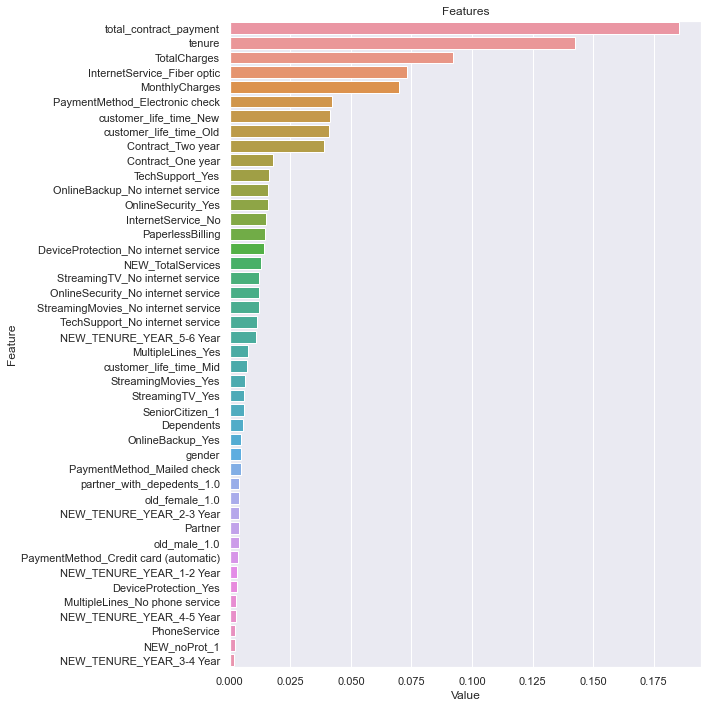

*************************XGBoost************************


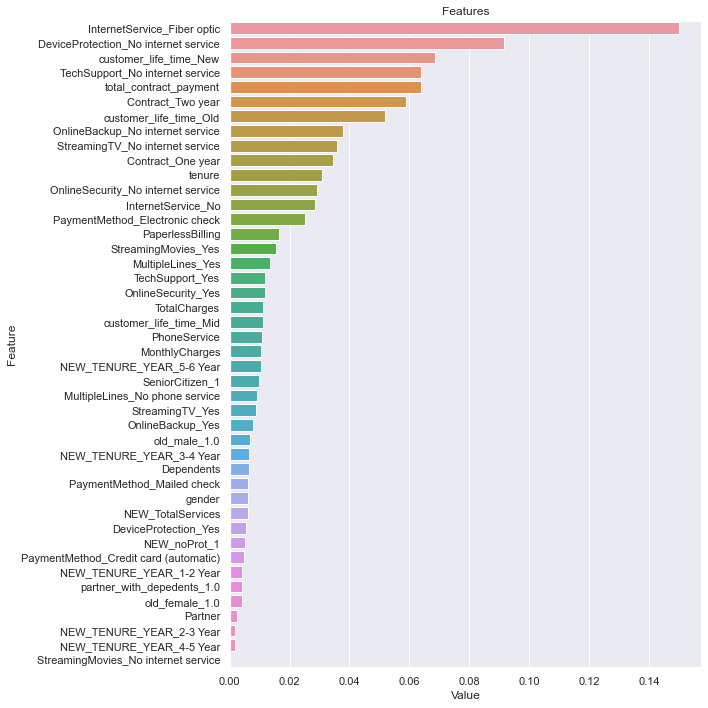

*************************LightGBM************************


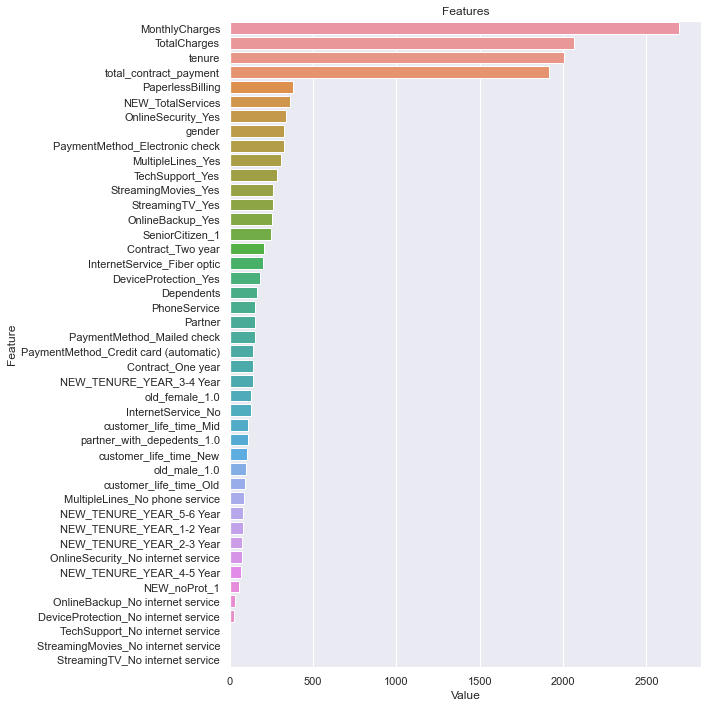

In [121]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
print("*************************Random Forests************************")
plot_importance(rf_final, X)
print("*************************XGBoost************************")
plot_importance(xgboost_final, X)
print("*************************LightGBM************************")
plot_importance(lgbm_final, X)